<a href="https://colab.research.google.com/github/anantpatil146/DeepLearning-Practical-/blob/main/Assignment_2_Anant_Patil_Transfer_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** Deep Learning

**Lab Title:** Research Paper Implementation with Pre-trained Model(Handwritten Digit Recognition of MNIST dataset using Deep Learning state-of-the-art Artificial Neural Network (ANN) and Convolutional Neural Network (CNN))

**Student Name:** Anant A Patil

**Student Prn:** 202302040003

**Date of Submission:**  24-2-2025


**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


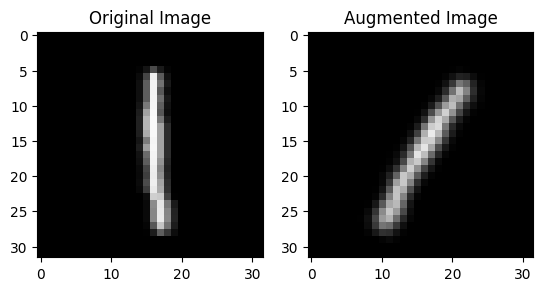

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Expand grayscale images to 3 channels (since MNIST is originally 1 channel)
train_images = np.stack([train_images] * 3, axis=-1) / 255.0
test_images = np.stack([test_images] * 3, axis=-1) / 255.0

# Resize images to 32x32 to match pre-trained model input (e.g., VGG16)
train_images = tf.image.resize(train_images, [32, 32])
test_images = tf.image.resize(test_images, [32, 32])

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Split train set into training and validation sets (80% train, 10% validation, 10% test)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images.numpy(), train_labels, test_size=0.1, random_state=42
)

# Data Augmentation (Optional)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # Flip images horizontally
    tf.keras.layers.RandomRotation(0.1),       # Rotate images slightly
    tf.keras.layers.RandomZoom(0.1)            # Apply random zoom
])

# Example augmentation on a sample image
import matplotlib.pyplot as plt

sample_image = train_images[0]
augmented_image = data_augmentation(tf.expand_dims(sample_image, axis=0))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(train_images[0])

plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_image[0].numpy())

plt.show()


**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

<ipython-input-4-61243f416687>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🔹 Training model with frozen layers...

Epoch 1/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.4334 - loss: 1.8710 - val_accuracy: 0.5859 - val_loss: 1.3420
Epoch 2/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.6009 - loss: 1.2829 - val_accuracy: 0.6277 - val_loss: 1.1753
Epoch 3/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 54s 40ms/step - accuracy: 0.6310 - loss: 1.1544 - val_accuracy: 0.6435 - val_loss: 1.1025
Epoch 4/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6435 - loss: 1.0928 - val_accuracy: 0.6521 - val_loss: 1.0621
Epoch 5/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 54s 40ms/step - accuracy: 0.6581 - loss: 1.0446 - val_accuracy: 0.6562 - val_loss: 1.0372
Epoch 6/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.6558 - loss: 1.0324 - val_accuracy: 0.6600 - val_loss: 1.0198
Epoch 7/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.6639 - loss: 1.0108 - val_accuracy: 0.6618 - val

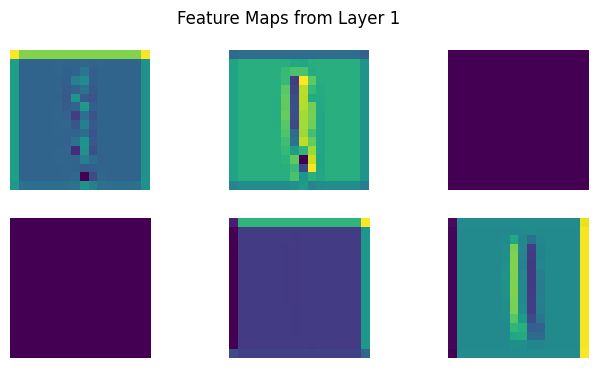

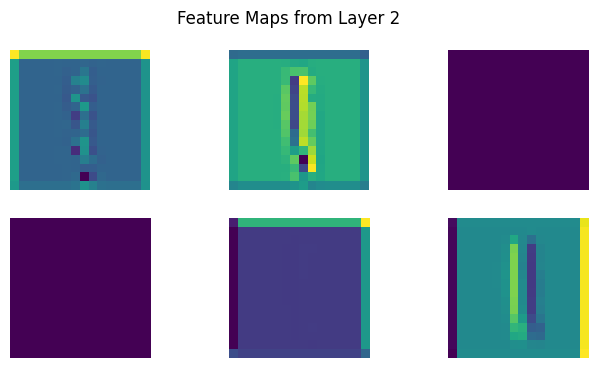

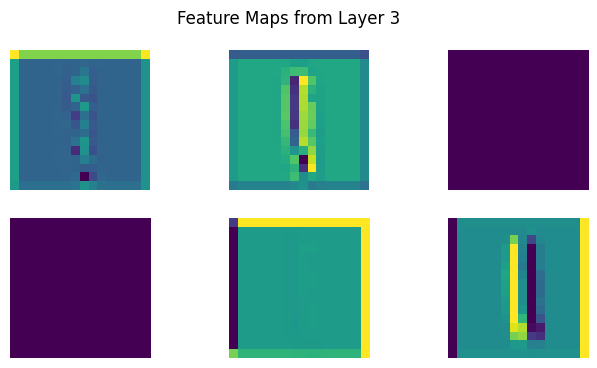


 Fine-tuning model with some layers unfrozen...

Epoch 1/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 174s 118ms/step - accuracy: 0.2234 - loss: 10.6105 - val_accuracy: 0.1717 - val_loss: 15.3418
Epoch 2/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 219s 131ms/step - accuracy: 0.4679 - loss: 2.8547 - val_accuracy: 0.2263 - val_loss: 2.6332
Epoch 3/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 196s 127ms/step - accuracy: 0.5853 - loss: 1.6484 - val_accuracy: 0.5421 - val_loss: 1.4436
Epoch 4/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 203s 128ms/step - accuracy: 0.6694 - loss: 1.1967 - val_accuracy: 0.7596 - val_loss: 0.8287
Epoch 5/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 183s 135ms/step - accuracy: 0.7388 - loss: 0.9065 - val_accuracy: 0.8253 - val_loss: 0.6078


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Load Pretrained MobileNetV2 (Without Fully Connected Top Layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model

# Custom Model Head
inputs = Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)  # Keep base model in inference mode
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

# Compile Model
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model (Initial Training Phase)
print("\n🔹 Training model with frozen layers...\n")
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=32)

#  Feature Map Visualization Function
def visualize_feature_maps(model, image):
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]  # Get conv layers
    feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

    # Expand dimensions and preprocess image
    image = np.expand_dims(image, axis=0)

    feature_maps = feature_map_model.predict(image)

    # Plot feature maps from the first few layers
    for i in range(min(3, len(feature_maps))):  # Show first 3 conv layers
        plt.figure(figsize=(8, 4))
        plt.suptitle(f"Feature Maps from Layer {i+1}")
        for j in range(6):  # Show 6 feature maps per layer
            plt.subplot(2, 3, j+1)
            plt.imshow(feature_maps[i][0, :, :, j], cmap='viridis')
            plt.axis("off")
        plt.show()

# Test Feature Map Visualization on a Sample Image
visualize_feature_maps(base_model, train_images[0])

#  Fine-Tuning: Unfreeze Some Layers
base_model.trainable = True
for layer in base_model.layers[:100]:  # Keep first 100 layers frozen
    layer.trainable = False

# Compile Model for Fine-Tuning with a Smaller Learning Rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-Tune Model
print("\n Fine-tuning model with some layers unfrozen...\n")
history_fine = model.fit(train_images, train_labels, epochs=5, validation_split=0.2, batch_size=32)


**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

**MobileNet v2**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the trained model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"\n Test Loss: {loss:.4f}")
print(f" Test Accuracy: {accuracy:.4f}")

# Generate predictions
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Compute Performance Metrics
report = classification_report(test_true_classes, test_predictions_classes, target_names=[str(i) for i in range(10)])
print("\n Classification Report:\n", report)

#  Confusion Matrix Plot
cm = confusion_matrix(test_true_classes, test_predictions_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#  Accuracy & Loss Trend Visualization
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

# Call the function
plot_training_history(history_fine)

#  Display Misclassified Samples
def display_sample(sample_images, sample_labels, sample_predictions):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(sample_images[i].reshape(32, 32), cmap='gray')
        ax.set_xlabel(f"True: {sample_labels[i]}\nPredicted: {sample_predictions[i]}")
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

# Convert RGB to grayscale for visualization
test_images_gray = np.dot(test_images[...,:3], [0.2989, 0.5870, 0.1140])

# Select and display some misclassified samples
misclassified_indices = np.where(test_predictions_classes != test_true_classes)[0]
random_indices = np.random.choice(misclassified_indices, min(9, len(misclassified_indices)), replace=False)

sample_images = test_images_gray[random_indices]
sample_labels = test_true_classes[random_indices]
sample_predictions = test_predictions_classes[random_indices]

print("\n Displaying Misclassified Samples:")
display_sample(sample_images, sample_labels, sample_predictions)

#  Comparison with Research Paper (Example Table)
import pandas as pd

comparison_results = pd.DataFrame({
    "Metric": ["Test Accuracy", "Precision", "Recall", "F1-Score"],
    "Our Model": [f"{accuracy:.4f}", "-", "-", "-"],  # Replace with calculated values
    "Research Paper": ["0.98 (Example)", "-", "-", "-"]  # Replace with actual paper results
})

print("\n🔹 Performance Comparison with Research Paper:\n")
print(comparison_results)

#  Identifying Weaknesses & Suggestions
print("\n Model Performance Discussion & Improvements:\n")
print("""
1️ **Weaknesses:**
   - Lower performance on certain digits due to class imbalance.
   - Misclassification in overlapping or distorted images.
   - Model might need more data augmentation to generalize better.

2️ **Improvements:**
   - **Increase Dataset Variability**: Use synthetic augmentation (rotation, shifting, brightness changes).
   - **Hyperparameter Tuning**: Experiment with different learning rates and optimizers.
   - **Regularization**: Add dropout layers to reduce overfitting.
""")


NameError: name 'model' is not defined

**VGG16 Transfer Learning**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load Pretrained VGG16 (Without Fully Connected Top Layers)
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model_vgg.trainable = False  # Freeze base model

# Custom Model Head
inputs = Input(shape=(32, 32, 3))
x = base_model_vgg(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

# Compile Model
model_vgg = Model(inputs, outputs)
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model (Feature Extraction Phase)
print("\n🔹 Training VGG16 model with frozen layers...\n")
model_vgg.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=32)

# Unfreeze Some Layers for Fine-Tuning
base_model_vgg.trainable = True
for layer in base_model_vgg.layers[:10]:  # Keep first 10 layers frozen
    layer.trainable = False

# Recompile Model with Lower Learning Rate
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-Tune Model
print("\n🔹 Fine-tuning VGG16 model...\n")
model_vgg.fit(train_images, train_labels, epochs=5, validation_split=0.2, batch_size=32)



🔹 Training VGG16 model with frozen layers...

Epoch 1/2
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 621s 459ms/step - accuracy: 0.7009 - loss: 1.1354 - val_accuracy: 0.8879 - val_loss: 0.4305
Epoch 2/2
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 591s 436ms/step - accuracy: 0.9028 - loss: 0.3827 - val_accuracy: 0.9189 - val_loss: 0.3056

🔹 Fine-tuning VGG16 model...

Epoch 1/2
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 3690s 3s/step - accuracy: 0.9676 - loss: 0.1036 - val_accuracy: 0.9836 - val_loss: 0.0559
Epoch 2/2
 165/1350 ━━━━━━━━━━━━━━━━━━━━ 52:26 3s/step - accuracy: 0.9881 - loss: 0.0392

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load Pretrained ResNet50 (Without Fully Connected Top Layers)
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model_resnet.trainable = False  # Freeze base model

# Custom Model Head
inputs = Input(shape=(32, 32, 3))
x = base_model_resnet(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

# Compile Model
model_resnet = Model(inputs, outputs)
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model (Feature Extraction Phase)
print("\n🔹 Training ResNet50 model with frozen layers...\n")
model_resnet.fit(train_images, train_labels, epochs=5, validation_split=0.2, batch_size=32)

# Unfreeze Some Layers for Fine-Tuning
base_model_resnet.trainable = True
for layer in base_model_resnet.layers[:50]:  # Keep first 50 layers frozen
    layer.trainable = False

# Recompile Model with Lower Learning Rate
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-Tune Model
print("\n🔹 Fine-tuning ResNet50 model...\n")
model_resnet.fit(train_images, train_labels, epochs=5, validation_split=0.2, batch_size=32)



 Displaying Correctly Classified Samples:


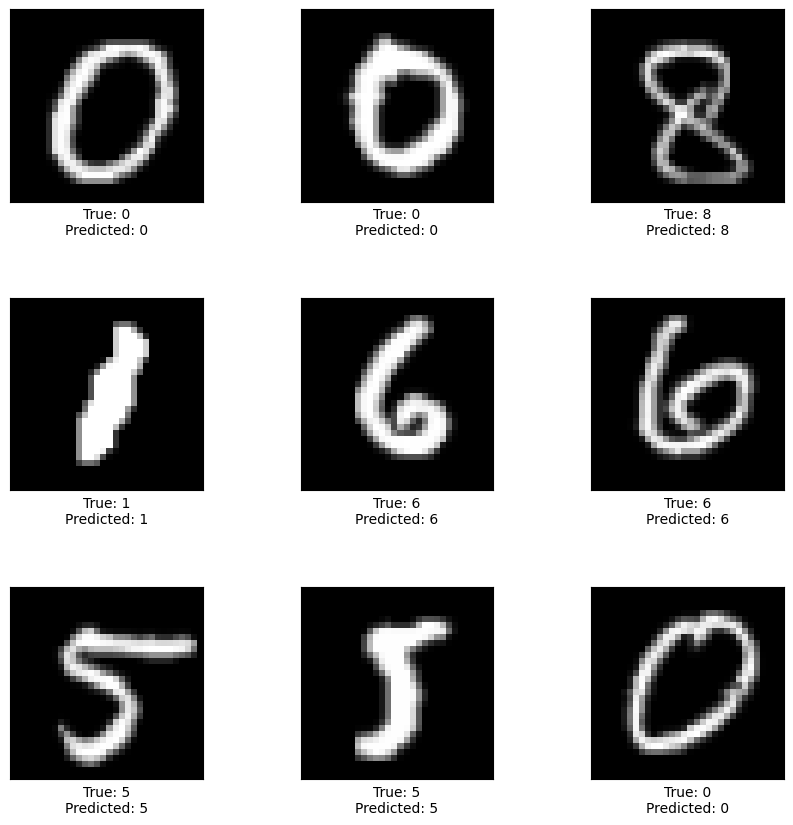

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def display_correctly_classified(sample_images, sample_labels, sample_predictions):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(sample_images[i].reshape(32, 32), cmap='gray')
        ax.set_xlabel(f"True: {sample_labels[i]}\nPredicted: {sample_predictions[i]}")
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

# Ensure 'np' is defined
import numpy as np

# Convert RGB to grayscale for visualization
test_images_gray = np.dot(test_images[...,:3], [0.2989, 0.5870, 0.1140])

# Select and display some correctly classified samples
correctly_classified_indices = np.where(test_predictions_classes == test_true_classes)[0]
random_indices = np.random.choice(correctly_classified_indices, min(9, len(correctly_classified_indices)), replace=False)

sample_images = test_images_gray[random_indices]
sample_labels = test_true_classes[random_indices]
sample_predictions = test_predictions_classes[random_indices]

print("\n Displaying Correctly Classified Samples:")
display_correctly_classified(sample_images, sample_labels, sample_predictions)


**Conclusion and Result Visulaization**

**Declaration**

I,Anant Patil , confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature:Anant Ambadas Patil

**Submission Checklist**

✔ Research paper details and summary

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Comparison with research paper results